<a href="https://colab.research.google.com/github/vibhawsahu6-ops/project-TT/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
data = {
    "Date": [
        "2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05",
        "2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05",
        "2024-01-01","2024-01-02","2024-01-03","2024-01-04","2024-01-05"
    ],
    "Product": [
        "Headphones","Headphones","Headphones","Headphones","Headphones",
        "Smartwatch","Smartwatch","Smartwatch","Smartwatch","Smartwatch",
        "Laptop Bag","Laptop Bag","Laptop Bag","Laptop Bag","Laptop Bag"
    ],
    "Our_Price": [
        1999,1999,1899,1899,1799,
        3499,3499,3399,3399,3299,
        1299,1299,1199,1199,1099
    ],
    "Amazon_Price": [
        1899,1920,1850,1880,1820,
        3399,3550,3300,3380,3250,
        1199,1249,1150,1180,1120
    ],
    "Flipkart_Price": [
        1950,1980,1900,1920,1850,
        3450,3400,3350,3320,3280,
        1250,1200,1180,1160,1100
    ]
}


In [20]:
df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df["Date"])

print("\nDataset Created Successfully:")
print(df.head())

print("\nMissing Values Check:")
print(df.isnull().sum())
df["Avg_Competitor_Price"] = df[["Amazon_Price", "Flipkart_Price"]].mean(axis=1)
df["Price_Difference"] = df["Our_Price"] - df["Avg_Competitor_Price"]

df["Pricing_Status"] = np.where(
    df["Price_Difference"] > 0, "Overpriced",
    np.where(df["Price_Difference"] < 0, "Underpriced", "Competitive")
)



Dataset Created Successfully:
        Date     Product  Our_Price  Amazon_Price  Flipkart_Price
0 2024-01-01  Headphones       1999          1899            1950
1 2024-01-02  Headphones       1999          1920            1980
2 2024-01-03  Headphones       1899          1850            1900
3 2024-01-04  Headphones       1899          1880            1920
4 2024-01-05  Headphones       1799          1820            1850

Missing Values Check:
Date              0
Product           0
Our_Price         0
Amazon_Price      0
Flipkart_Price    0
dtype: int64


In [21]:
print("\nPrice Comparison:")
print(df[["Date", "Product", "Our_Price", "Avg_Competitor_Price", "Pricing_Status"]])

summary_stats = df.groupby("Product")[["Our_Price", "Avg_Competitor_Price"]].agg(
    ["mean", "min", "max"]
)

print("\nSummary Statistics:")
print(summary_stats)


Price Comparison:
         Date     Product  Our_Price  Avg_Competitor_Price Pricing_Status
0  2024-01-01  Headphones       1999                1924.5     Overpriced
1  2024-01-02  Headphones       1999                1950.0     Overpriced
2  2024-01-03  Headphones       1899                1875.0     Overpriced
3  2024-01-04  Headphones       1899                1900.0    Underpriced
4  2024-01-05  Headphones       1799                1835.0    Underpriced
5  2024-01-01  Smartwatch       3499                3424.5     Overpriced
6  2024-01-02  Smartwatch       3499                3475.0     Overpriced
7  2024-01-03  Smartwatch       3399                3325.0     Overpriced
8  2024-01-04  Smartwatch       3399                3350.0     Overpriced
9  2024-01-05  Smartwatch       3299                3265.0     Overpriced
10 2024-01-01  Laptop Bag       1299                1224.5     Overpriced
11 2024-01-02  Laptop Bag       1299                1224.5     Overpriced
12 2024-01-03  Lapt

In [22]:
strategy = df.groupby("Product")["Pricing_Status"].value_counts(normalize=True) * 100
strategy = strategy.unstack().fillna(0)

print("\nPricing Strategy (% of Days):")
print(strategy)



Pricing Strategy (% of Days):
Pricing_Status  Overpriced  Underpriced
Product                                
Headphones            60.0         40.0
Laptop Bag            80.0         20.0
Smartwatch           100.0          0.0


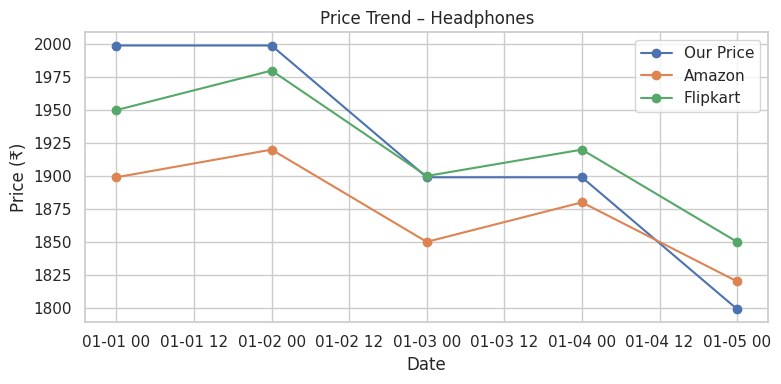

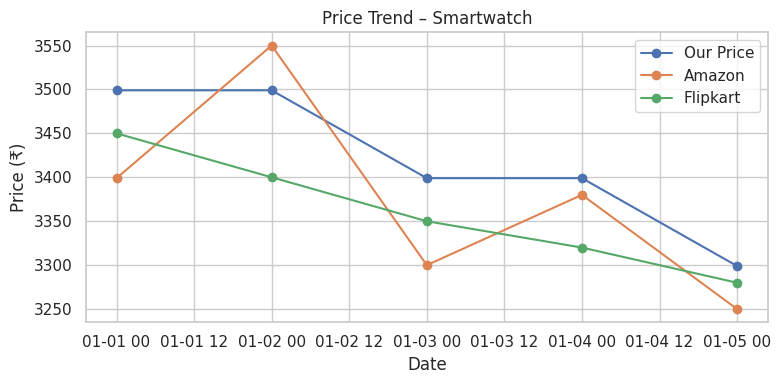

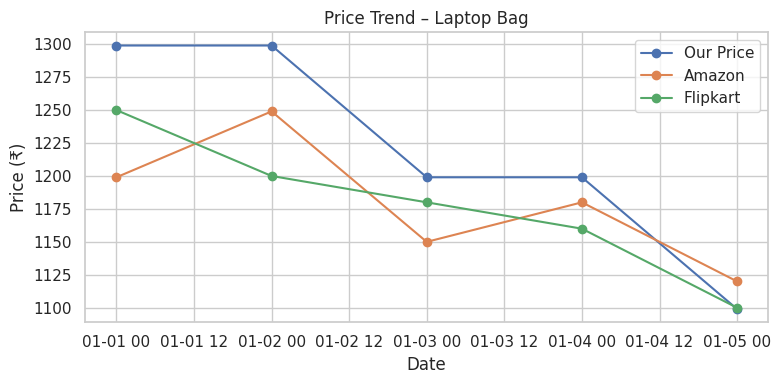

In [23]:
sns.set(style="whitegrid")

for product in df["Product"].unique():
    product_df = df[df["Product"] == product]

    plt.figure(figsize=(8, 4))
    plt.plot(product_df["Date"], product_df["Our_Price"], marker="o", label="Our Price")
    plt.plot(product_df["Date"], product_df["Amazon_Price"], marker="o", label="Amazon")
    plt.plot(product_df["Date"], product_df["Flipkart_Price"], marker="o", label="Flipkart")

    plt.title(f"Price Trend – {product}")
    plt.xlabel("Date")
    plt.ylabel("Price (₹)")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [24]:
print("\nFinal Pricing Recommendations:")
for product in df["Product"].unique():
    avg_diff = df[df["Product"] == product]["Price_Difference"].mean()

    if avg_diff > 50:
        print(f"{product}: Reduce Price (Overpriced)")
    elif avg_diff < -50:
        print(f"{product}: Can Increase Price (Underpriced)")
    else:
        print(f"{product}: Pricing is Competitive")


Final Pricing Recommendations:
Headphones: Pricing is Competitive
Smartwatch: Reduce Price (Overpriced)
Laptop Bag: Pricing is Competitive
